# UniRef90 Invertebrate Animal Analysis

##### The below analysis was conducted utilizing a filter to extract invertebrate animal hosts from the cleaned UniRef90 sequences and following the pre-processing steps. Through importing necessary libraries and using NCBI taxonomy database, plots were generated to visualize distributions of the invertebrate animal hosts and associated viruses.

### Installing dependencies and loading csv files

In [1]:
!pip install ete3

In [4]:
# import appropriate directories for analysis
import pandas as pd
import os
from ete3 import NCBITaxa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib.gridspec import GridSpec
import plotly.graph_objs as go
from plotly.subplots import make_subplots

The below code reads in a csv file that merges the invertebrate host data with the full lineage ranks and tax IDs for further analysis.

In [5]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_nonvertebrates_w_seq_kingdom_class_animal.csv")
df = pd.read_csv(file_path)
df.head()

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,Code,Name,kingdom,LineageTaxIDs,Rank,FullLineage,FullLineageTaxIDs,FullLineageRanks,class
0,UniRef90_A0A292E049,2045185,ATN29921.1,['Culex nigripalpus'],Culex nigripalpus,Long Pine Key virus,species,42429,species,MRRIDMKSMVFRARRPVNRAVDIIKRQLPRVPTPRRVARNVANRLN...,42429,Culex nigripalpus,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33317;12067...,cellular root;domain;clade;kingdom;clade;clade...,Insecta
1,UniRef90_A0A9Y1HTX6,3003986,WAX26076.1,['Dorylus sp.'],Dorylus sp.,Army ant associated chapparvovirus 3,species,2995614,species,MATRSDRDCAIPNGSADVQVEVAAAAASSVNSSLEDGEGAGGVHED...,2995614,Dorylus sp.,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33317;12067...,cellular root;domain;clade;kingdom;clade;clade...,Insecta
2,UniRef90_A0A9Y1HTY6,3003999,WAX26106.1,['Dorylus sp.'],Dorylus sp.,Army ant associated dicistrovirus 6,species,2995614,species,MLLFGVYKCACTFPRRKVYIEQKFVYWQTLCSTQNMSLSKIAINVK...,2995614,Dorylus sp.,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33317;12067...,cellular root;domain;clade;kingdom;clade;clade...,Insecta
3,UniRef90_A0A9Y1HU34,3004003,WAX26117.1,['Dorylus sp.'],Dorylus sp.,Army ant associated iflavirus 1,species,2995614,species,MREGIIPVLSSGFRFYNGGVRLRIVVTGLNDSIWVQHHPDRQFTKS...,2995614,Dorylus sp.,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33317;12067...,cellular root;domain;clade;kingdom;clade;clade...,Insecta
4,UniRef90_A0A9Y1HU81,3003983,WAX26068.1,['Dorylus sp.'],Dorylus sp.,Army ant associated chapparvovirus 2,species,2995614,species,MAERSNRDGGLPNESVDVQVEVTGTRATASNNNGLDGGGPAREVHE...,2995614,Dorylus sp.,Metazoa,33208.0,species,cellular organisms;Eukaryota;Opisthokonta;Meta...,131567;2759;33154;33208;6072;33213;33317;12067...,cellular root;domain;clade;kingdom;clade;clade...,Insecta


### Host Distributions

#### Host Class Analysis

In [6]:
ncbi = NCBITaxa()

# function to retrieve the kingdom and class from a taxid
def get_class(taxid):
    try:
        lineage = ncbi.get_lineage(taxid)
        names = ncbi.get_taxid_translator(lineage)
        ranks = ncbi.get_rank(lineage)

        clas = next((names[t] for t in lineage if ranks[t] == "class"), "Unknown")
        return pd.Series([clas])
    except:
        return pd.Series(["Unknown"])

# apply the function to the virus_host_tax_id column in the dataframe
df[['Class']] = df['virus_host_tax_id'].apply(get_class)

/Users/mallibalasarayutanmaypulipati/anaconda3/envs/virprobert/lib/python3.11/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1507126 was translated into 2922063
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/mallibalasarayutanmaypulipati/anaconda3/envs/virprobert/lib/python3.11/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1843376 was translated into 167526
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))


Text(0.5, 1.0, 'Invertebrate Animal Hosts Class Distribution')

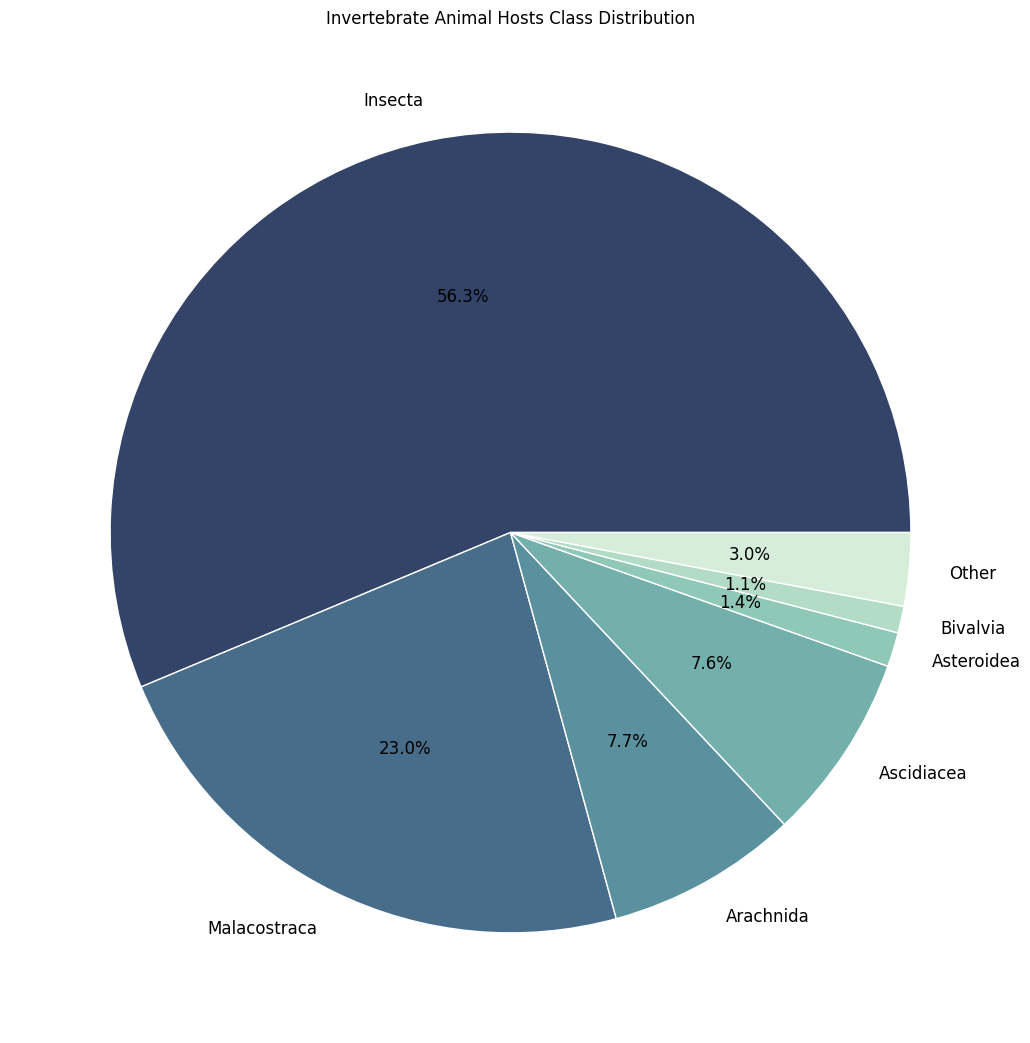

In [7]:
# count frequencies of host classes
class_counts = df['Class'].value_counts()
class_counts = class_counts.drop('Unknown', errors='ignore')
total = class_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.01 # 1%
class_counts_filtered = class_counts[class_counts / total >= threshold]
other_count = class_counts[class_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    class_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(class_counts_filtered), reverse=True)

class_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    textprops={'color':'k', 'size':'12'},
    legend=False)
plt.title("Invertebrate Animal Hosts Class Distribution")

In [9]:
# list of host classes below 1% prevalence in the dataset
class_counts = df['Class'].value_counts(normalize=True)
classes_below_threshold = class_counts[class_counts <  0.01]
print("\nClasses below 0.05%:")
print(classes_below_threshold.apply(lambda x: f"{x*100:.4f}%"))


Classes below 0.05%:
Gastropoda       0.8373%
Demospongiae     0.4884%
Anthozoa         0.2946%
Clitellata       0.2559%
Holothuroidea    0.2248%
Chromadorea      0.1938%
Leptocardii      0.1163%
Cestoda          0.1163%
Hexanauplia      0.0930%
Echinoidea       0.0543%
Enoplea          0.0543%
Rhabditophora    0.0543%
Tentaculata      0.0543%
Collembola       0.0388%
Unknown          0.0233%
Cephalopoda      0.0233%
Polychaeta       0.0155%
Eurotatoria      0.0155%
Diplopoda        0.0078%
Symphyla         0.0078%
Staurozoa        0.0078%
Name: Class, dtype: object


In [10]:
# define functions for extrapolating data to configure pie charts and getting labels given a threshold
def get_data_for_pie_chart(df, col_name, n, threshold):
    count_data = df[col_name].value_counts().to_dict()

    label_data = {}
    prevalence_data = {}
    for k, v in count_data.items():
        prevalence = (v/n)*100
        prevalence_data[k] = f"{k} ({prevalence:.2f}%)"
        if prevalence <= threshold:
            prevalence_data[k] = f"{k} ({prevalence:.3f}%)"
            label_data[k] = ""
        else:
            label_data[k] = k
    return count_data, label_data, prevalence_data

def get_label(pct, threshold):
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

In [11]:
# apply above function for the host classes
class_count_data, class_label_data, class_prevalence_data = get_data_for_pie_chart(df, "class", df.shape[0], threshold=0.5)

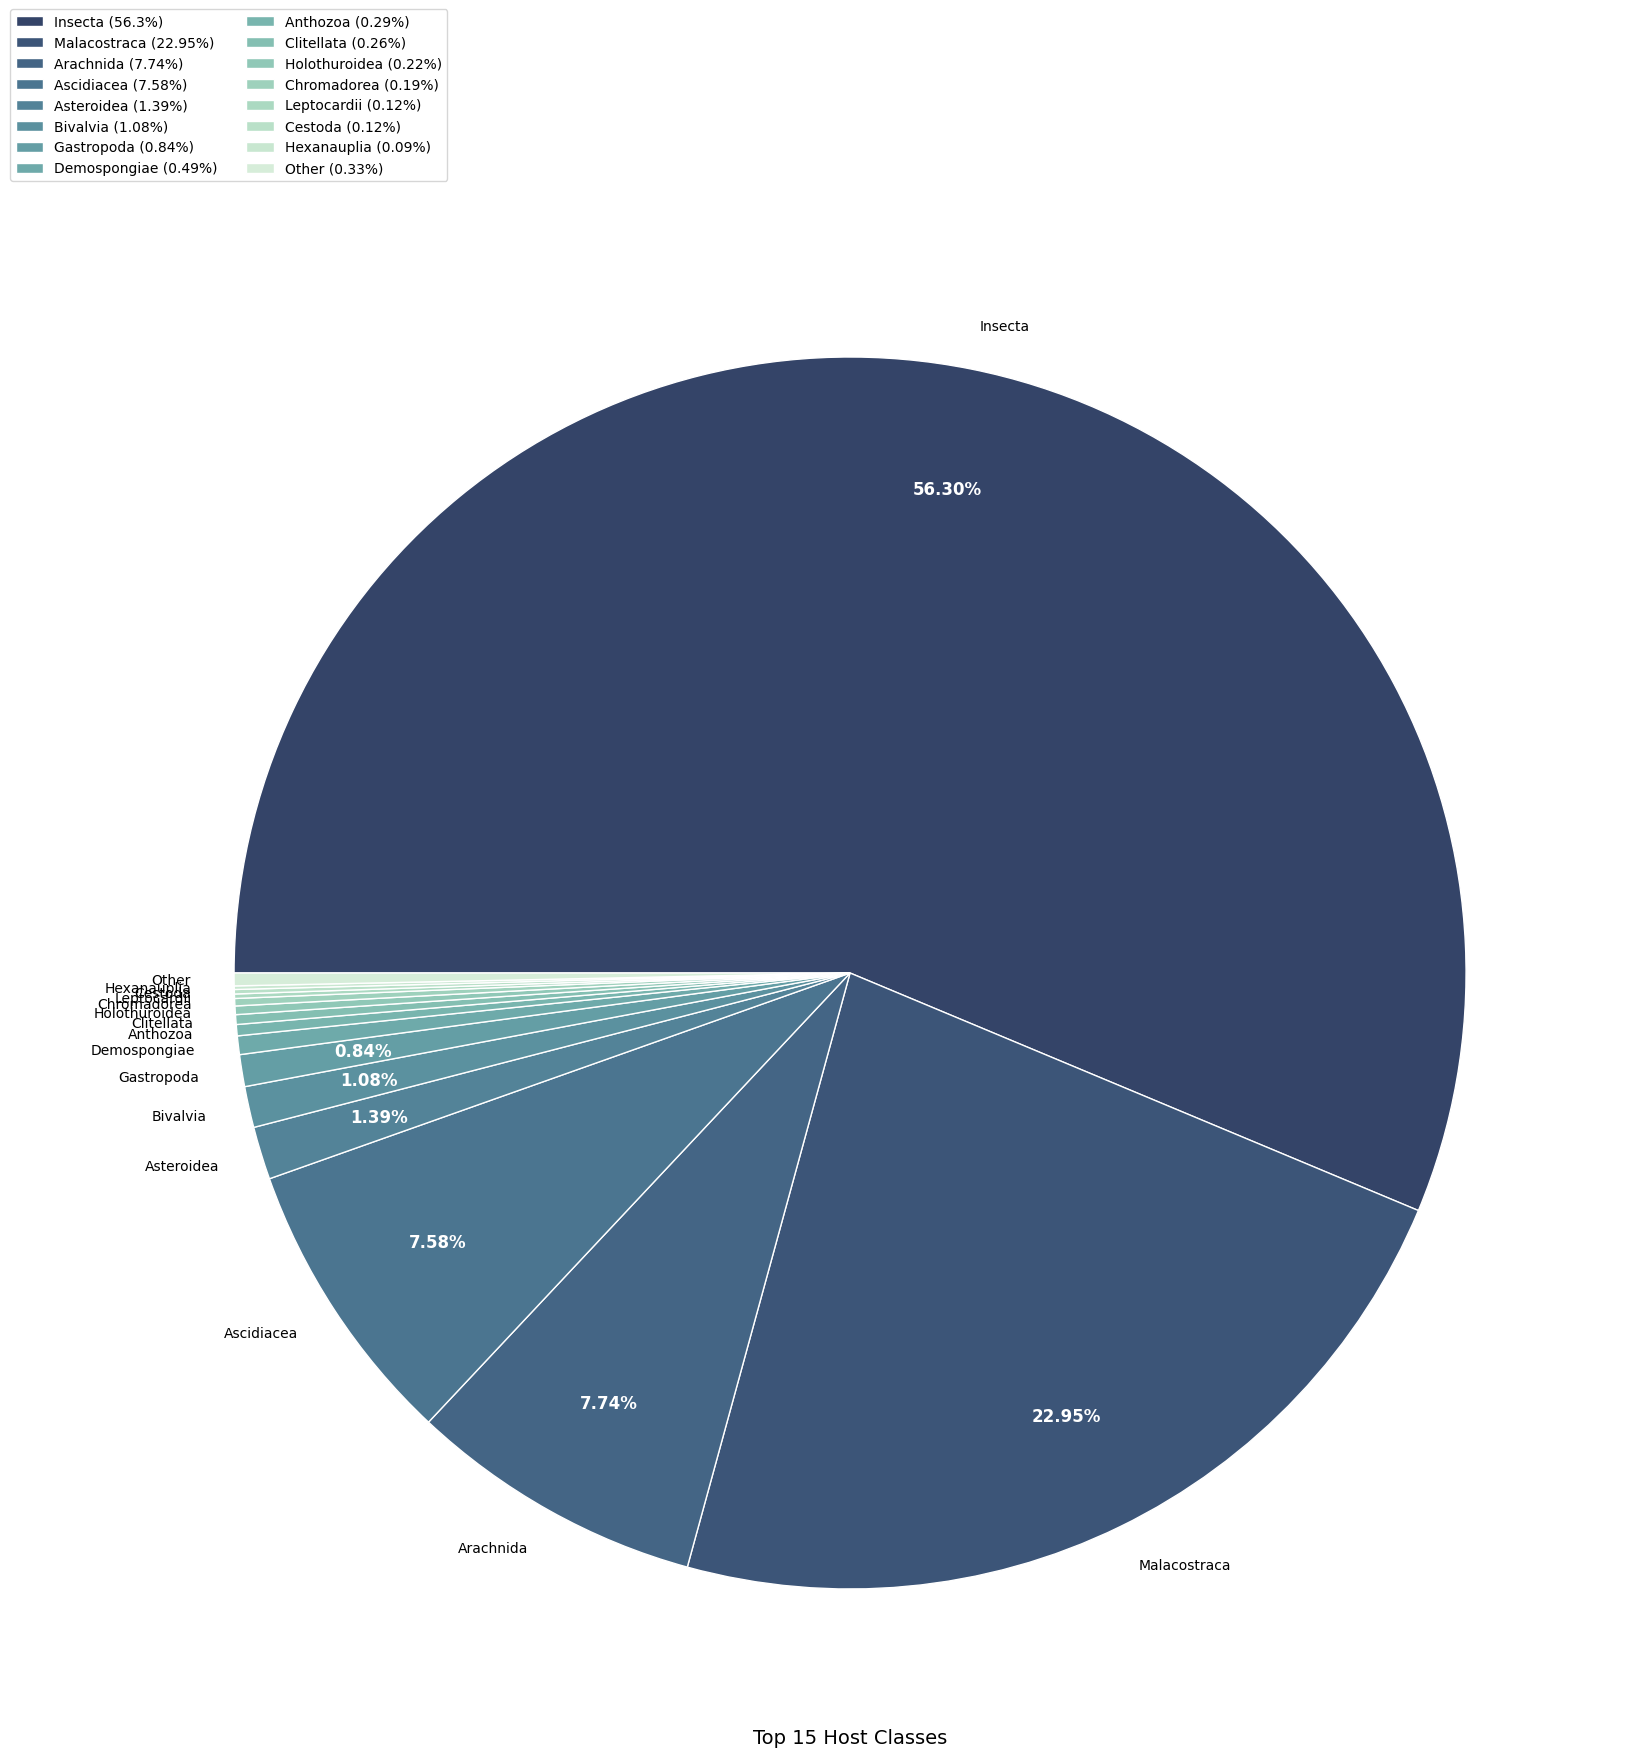

In [14]:
# sort host class counts in descending order
sort_counts = sorted(class_count_data.items(), key=lambda x: x[1], reverse=True)

# retrieve the top 15 host class counts
top_15 = dict(sort_counts[:15])

# calculate the sum of the host class counts not belonging to the top 15
other_sum = sum(count for _, count in sort_counts[15:])
top_15["Other"] = other_sum

# assign labels and counts for the top 15 host class counts
labels = list(top_15.keys())
counts = list(top_15.values())
percentages = np.round((counts / df['class'].count()) * 100, decimals=2)
formatted_values = [f"{percent}%" for percent in percentages]

# configure and plot the pie chart
fig, ax = plt.subplots(figsize=(20, 20))
threshold = 0.5

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct=lambda pct: get_label(pct, threshold),
    pctdistance=0.8,
    startangle=-180,
    labeldistance=1.07,
    counterclock=False,
    colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(labels), reverse=True),
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# generate a legend to display the top 15 host classes and other category
combined_labels = [f"{label} ({value})" for label, value in zip(labels, formatted_values)]
ax.legend(wedges, combined_labels, title="", loc="center left", bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Top 15 Host Classes", fontsize=14, y=0, pad=0)
plt.show()


In [15]:
n = df['kingdom'].value_counts().sum()
kingdom_count_data, kingdom_label_data, kingdom_prevalence_data = get_data_for_pie_chart(df, "kingdom", n, threshold=0.5)

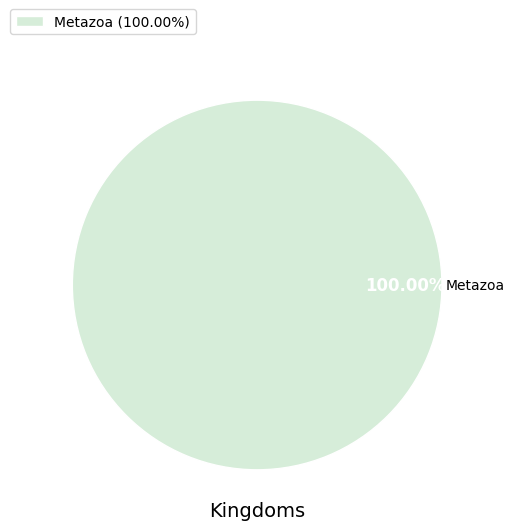

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

threshold=0.5
wedges, texts, autotexts = ax.pie(kingdom_count_data.values(), labels=list(kingdom_label_data.values()), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(kingdom_label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, kingdom_prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Kingdoms", fontsize=14, y=0, pad=0)
plt.show()

In [17]:
kingdom_prevalence_data

{'Metazoa': 'Metazoa (100.00%)'}

In [18]:
kingdom_label_data

{'Metazoa': 'Metazoa'}

In [19]:
kingdom_count_data

{'Metazoa': 12898}

### Kingdom-Level Host Composition with Class Subdivision

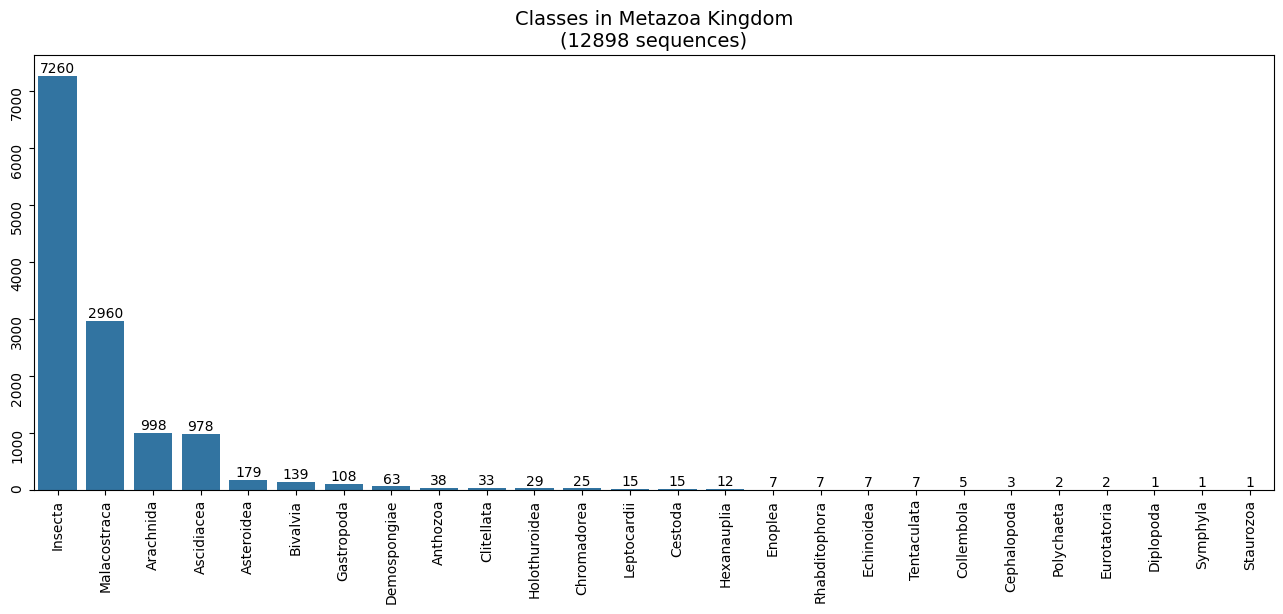

In [23]:
fig = plt.figure(figsize=(16,48))

gs = GridSpec(6, 6, wspace=.4,  hspace=.5)
kingdoms = list(df["kingdom"].unique())
n_kingdoms = len(kingdoms)

axs = []
axs.append(fig.add_subplot(gs[0, :]))

i = 0
for kingdom, kingdom_count in kingdom_count_data.items():
    if i == n_kingdoms:
        break
    ax = axs[i]
    
    kingdom_data = df[df["kingdom"] == kingdom]
    n_kingdom = df['kingdom'].value_counts().sum()

    count_data, _, _ = get_data_for_pie_chart(kingdom_data, "class", n_kingdom, threshold=1.0)
    
    sns.barplot(count_data, ax=ax)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_title(f"Classes in {kingdom} Kingdom\n({kingdom_count} sequences)", fontsize=14)
    ax.set_ylabel("", fontsize=0)

    if len(count_data) > 4:
        ax.tick_params(labelrotation=90)
    i += 1

plt.show()

### Viral Protein Sequence Length

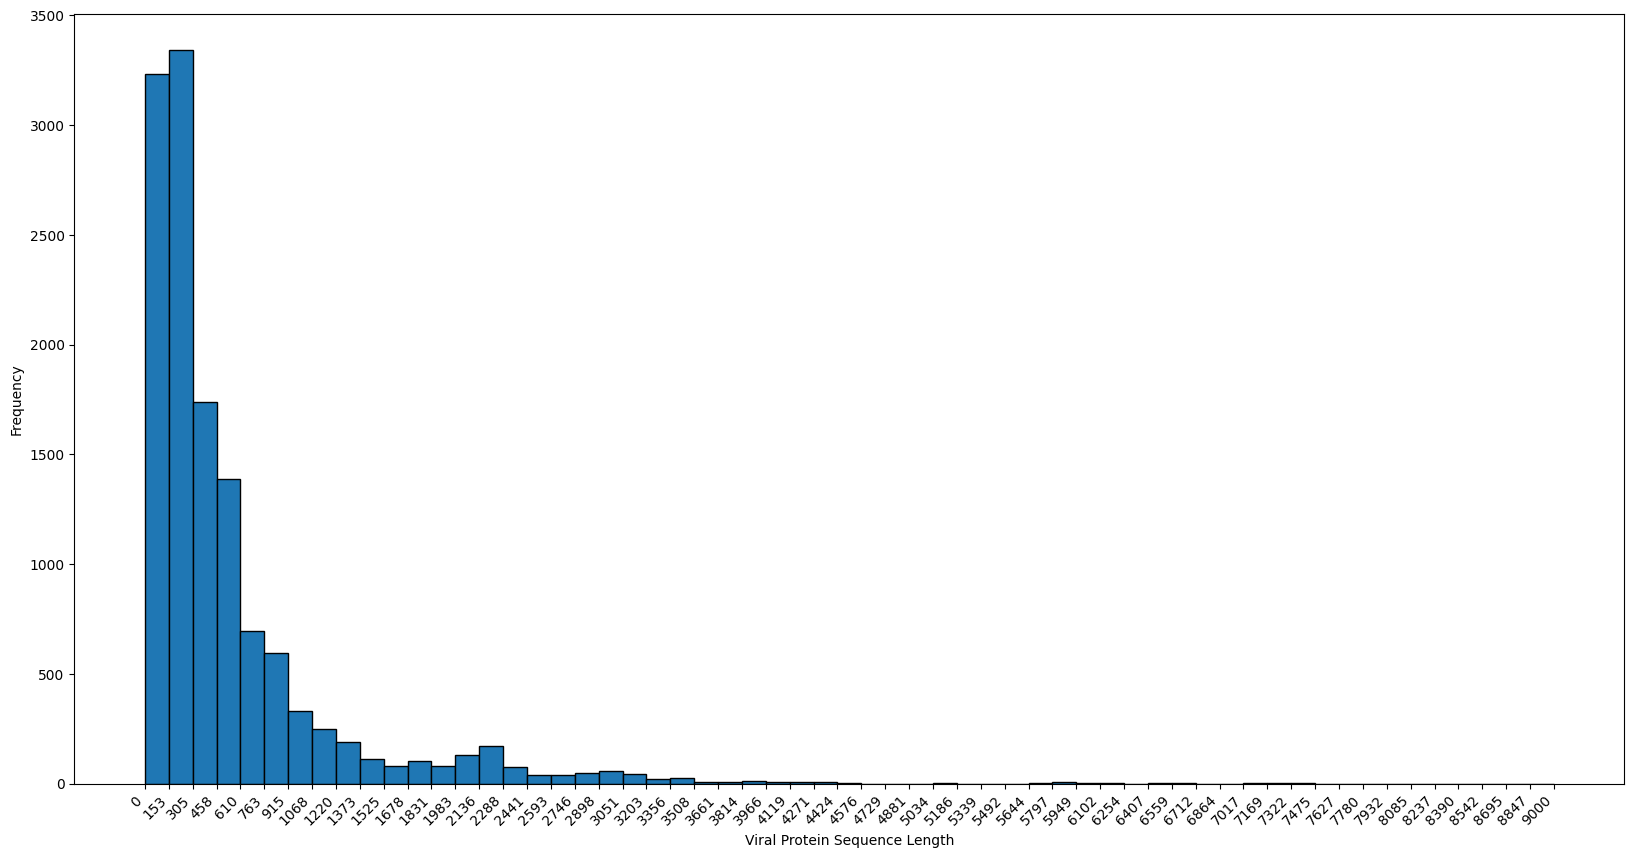

In [24]:
# determine the length of each viral protein sequence using a list comprehension
# plot a histogram given equally spaced intervals
seq_len = [len(seq) for seq in df['seq']]
bins = np.linspace(0, 9000, 60)
plt.figure(figsize=(20, 10))
plt.hist(seq_len, bins=bins, edgecolor='black')
plt.xlabel('Viral Protein Sequence Length')
plt.ylabel('Frequency')
plt.xticks(bins, ha='right', rotation=45)
plt.show()

### Virus Composition

In [25]:
ncbi = NCBITaxa()

def get_virus_info(taxid):
    name = ncbi.get_taxid_translator([int(taxid)]).get(int(taxid), 'Unknown')
    lineage = ncbi.get_lineage(int(taxid))
    names = ncbi.get_taxid_translator(lineage)
    ranks = ncbi.get_rank(lineage)

    species = ''
    genus = ''
    family = ''

    try:
        for tid in lineage:
            rank = ranks.get(tid, '')
            name = names.get(tid, '')
            if rank == 'species':
                species = name
            elif rank == 'genus':
                genus = name
            elif rank == 'family':
                family = name
            elif rank == 'order':
                order = name
        return pd.Series([species if species else 'Unknown', genus if genus else 'Unknown', family if family else 'Unknown', order if order else 'Unknown'])
    except:
        return pd.Series(['Unknown', 'Unknown', 'Unknown', 'Unknown'])

df[['virus_species', 'virus_genus', 'virus_family', 'virus_order']] = df['tax_id'].apply(get_virus_info)

Text(0.5, 1.0, "Invertebrate Animal Virus' Order Distribution")

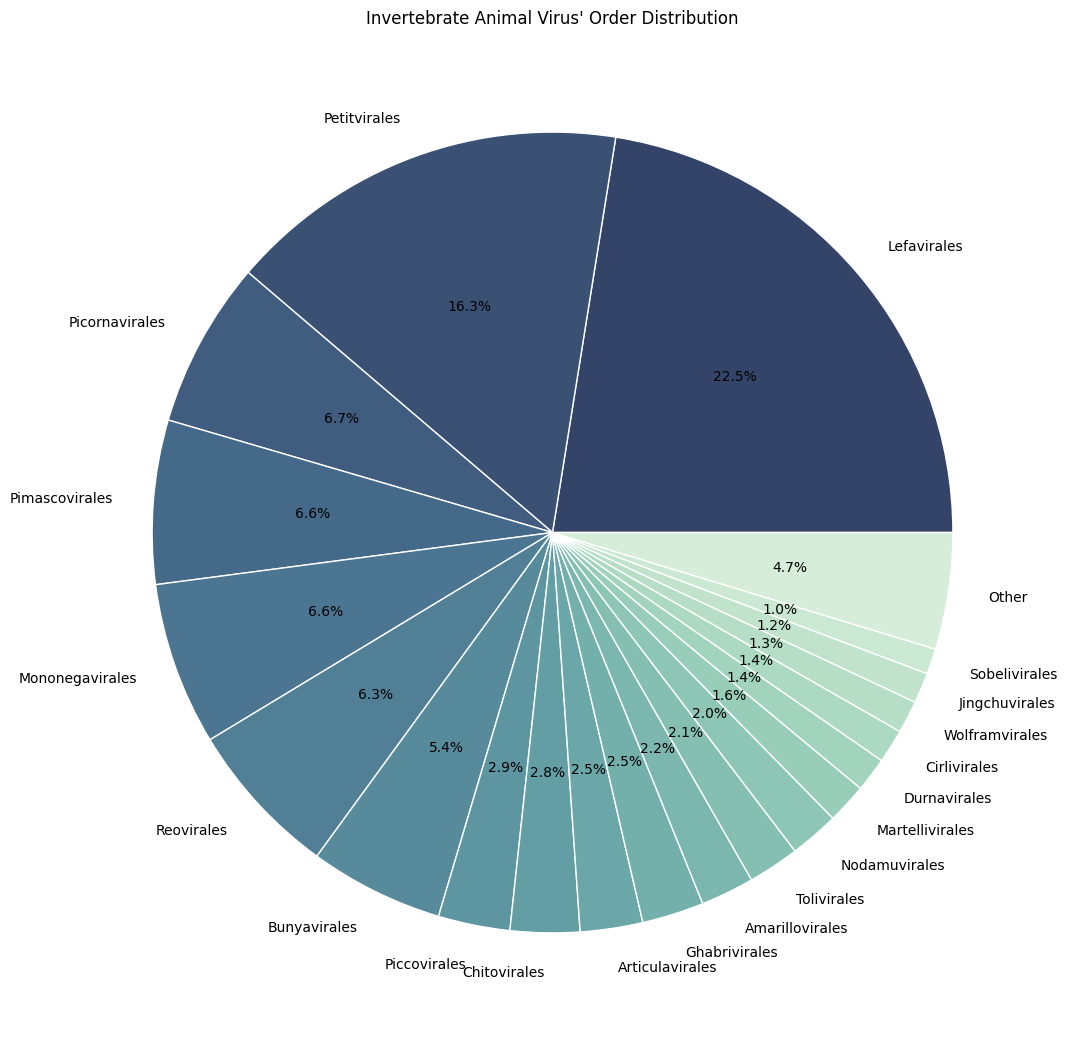

In [31]:
# count frequencies of virus order
order_counts = df['virus_order'].value_counts()
order_counts = order_counts.drop('Unknown', errors='ignore')
total = order_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.01 # 1%
order_counts_filtered = order_counts[order_counts / total >= threshold]
other_count = order_counts[order_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    order_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(order_counts_filtered), reverse=True)

order_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Invertebrate Animal Virus' Order Distribution")

Text(0.5, 1.0, "Invertebrate Animal Virus' Family Distribution")

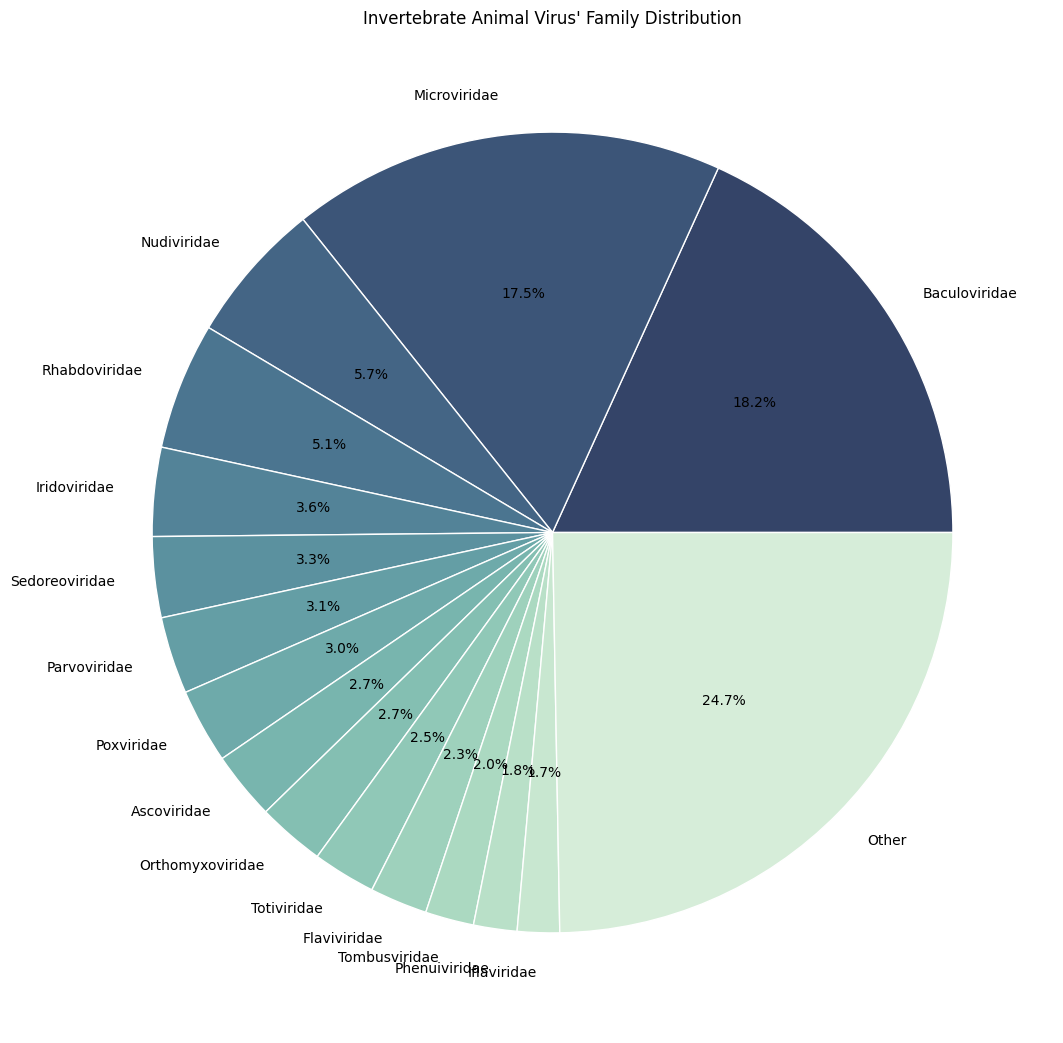

In [32]:
# count frequencies of virus families
family_counts = df['virus_family'].value_counts()
family_counts = family_counts.drop('Unknown', errors='ignore')
total = family_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.015 # 1%
family_counts_filtered = family_counts[family_counts / total >= threshold]
other_count = family_counts[family_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    family_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(family_counts_filtered), reverse=True)

family_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Invertebrate Animal Virus' Family Distribution")

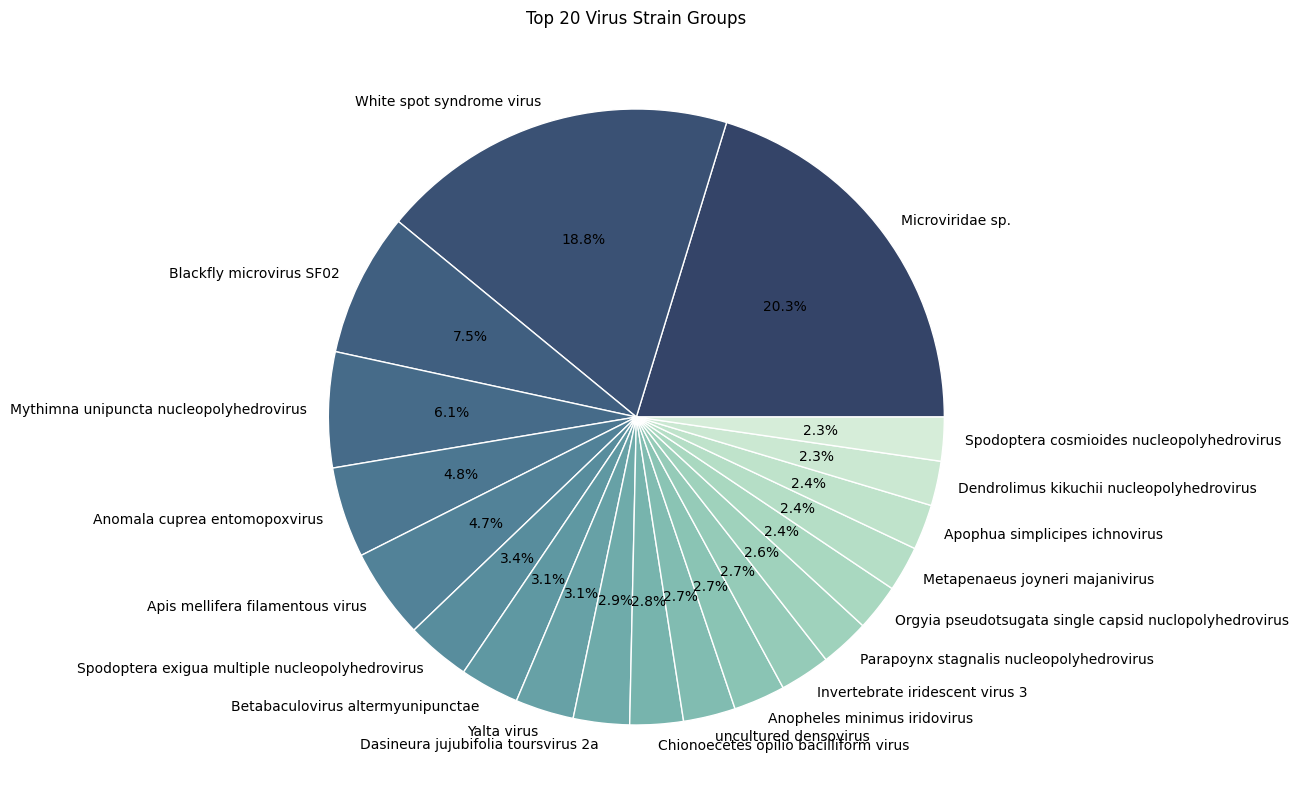

In [33]:
# get the top 20 most frequent strains that infect invertebrates
top_20 = 20
top_groups = df['virus_name'].value_counts().nlargest(top_20).index

# categorize all other strains into "other" category
df['strain_group_filtered'] = df['virus_name'].apply(lambda x: x if x in top_groups else 'other')

# count occurrences of top strains only (exclude "other")
filtered_df = df[df['strain_group_filtered'] != 'other']
strain_counts = filtered_df['strain_group_filtered'].value_counts()

# initialize a color palette
colors = sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(strain_counts), reverse=True)

# configure and plot pie chart
strain_counts.plot(
    kind='pie',
    labeldistance=1.07,
    autopct='%1.1f%%',
    title='Top 20 Virus Strain Groups',
    figsize=(10, 10), colors=colors, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    ylabel='',
    legend=False)
plt.show()

### Virus Host Counts

In [34]:
n = df.shape[0]
host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=.01)
others_hosts = []
for k,v in host_count_data.items():
    if (v/n*100) <= 1.5:
        others_hosts.append(k)
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Others ({len(others_hosts)} hosts)")

host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)

In [35]:
host_prevalence_data

{'Ciona robusta': 'Ciona robusta (7.52%)',
 'Penaeus monodon': 'Penaeus monodon (4.83%)',
 'Penaeus vannamei': 'Penaeus vannamei (4.42%)',
 'Apis mellifera': 'Apis mellifera (3.64%)',
 'Mythimna unipuncta': 'Mythimna unipuncta (3.40%)',
 'Austrosimulium ungulatum': 'Austrosimulium ungulatum (2.80%)',
 'Drosophila melanogaster': 'Drosophila melanogaster (2.56%)',
 'Neohydatothrips variabilis': 'Neohydatothrips variabilis (1.84%)',
 'Anomala cuprea': 'Anomala cuprea (1.77%)'}

In [36]:
n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
host_prevalence_data["Hosts with prevalence <= 1.5%"] = f"Hosts with prevalence <= 0.15%\n{len(others_hosts)} hosts ({n_others/n*100:.2f}%)"

In [37]:
host_prevalence_data

{'Ciona robusta': 'Ciona robusta (7.52%)',
 'Penaeus monodon': 'Penaeus monodon (4.83%)',
 'Penaeus vannamei': 'Penaeus vannamei (4.42%)',
 'Apis mellifera': 'Apis mellifera (3.64%)',
 'Mythimna unipuncta': 'Mythimna unipuncta (3.40%)',
 'Austrosimulium ungulatum': 'Austrosimulium ungulatum (2.80%)',
 'Drosophila melanogaster': 'Drosophila melanogaster (2.56%)',
 'Neohydatothrips variabilis': 'Neohydatothrips variabilis (1.84%)',
 'Anomala cuprea': 'Anomala cuprea (1.77%)',
 'Hosts with prevalence <= 1.5%': 'Hosts with prevalence <= 0.15%\n804 hosts (67.23%)'}

In [38]:
host_count_data

{'Ciona robusta': 970,
 'Penaeus monodon': 623,
 'Penaeus vannamei': 570,
 'Apis mellifera': 469,
 'Mythimna unipuncta': 439,
 'Austrosimulium ungulatum': 361,
 'Drosophila melanogaster': 330,
 'Neohydatothrips variabilis': 237,
 'Anomala cuprea': 228}

In [39]:
host_count_data["Hosts with prevalence <= 1%"] = n_others
host_count_data

{'Ciona robusta': 970,
 'Penaeus monodon': 623,
 'Penaeus vannamei': 570,
 'Apis mellifera': 469,
 'Mythimna unipuncta': 439,
 'Austrosimulium ungulatum': 361,
 'Drosophila melanogaster': 330,
 'Neohydatothrips variabilis': 237,
 'Anomala cuprea': 228,
 'Hosts with prevalence <= 1%': 8671}

7.520546019077301
4.8302061855793
4.419289901852608
3.636222705245018
3.4036286175251007
2.798883616924286
2.5585362687706947
1.8374942243099213
1.767715997993946
67.22747683525085


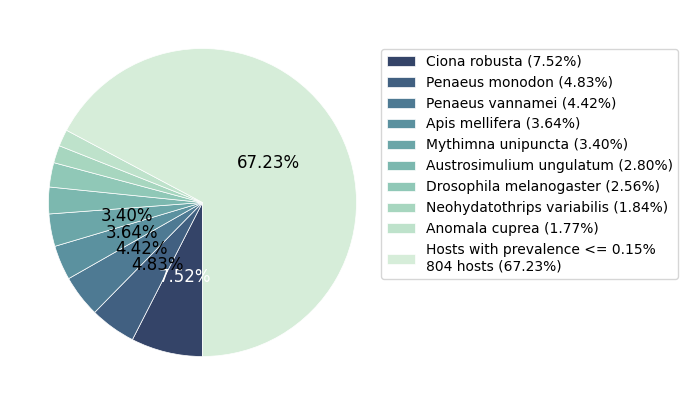

In [40]:
fig, ax = plt.subplots(figsize=(9, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(host_count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.5, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(host_count_data), reverse=True), 
                                  wedgeprops={"linewidth": .5, "edgecolor": "white"})

ax.legend(wedges, host_prevalence_data.values(),
          title="",
          loc="center",
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=12, color="black")
plt.setp(autotexts[0], size=12, color="white")
plt.setp(autotexts[-1], size=12, color="black")
#ax.set_title("IV Dataset", fontsize=14, y=0, pad=0)
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/noniv_hosts_pie.pdf"), bbox_inches="tight", dpi=600)
plt.show()

### Virus Counts

In [41]:
vir_count_data, vir_label_data, vir_prevalence_data = get_data_for_pie_chart(df, col_name="virus_name", n=n, threshold=0.01)
other_viruses = []
for k,v in vir_count_data.items():
    if(v/n*100) <= 0.5:
        other_viruses.append(k)

df["virus_name_mod"] = df["virus_name"].apply(lambda x: x if x not in other_viruses else f"Others ({len(other_viruses)} viruses)")
vir_count_data, vir_label_data, vir_prevalence_data = get_data_for_pie_chart(df[~df["virus_name"].isin(other_viruses)], col_name="virus_name_mod", n=n, threshold=0.01)

In [42]:
vir_prevalence_data

{'Microviridae sp.': 'Microviridae sp. (7.52%)',
 'White spot syndrome virus': 'White spot syndrome virus (6.97%)',
 'Blackfly microvirus SF02': 'Blackfly microvirus SF02 (2.80%)',
 'Mythimna unipuncta nucleopolyhedrovirus': 'Mythimna unipuncta nucleopolyhedrovirus (2.25%)',
 'Anomala cuprea entomopoxvirus': 'Anomala cuprea entomopoxvirus (1.77%)',
 'Apis mellifera filamentous virus': 'Apis mellifera filamentous virus (1.76%)',
 'Spodoptera exigua multiple nucleopolyhedrovirus': 'Spodoptera exigua multiple nucleopolyhedrovirus (1.25%)',
 'Betabaculovirus altermyunipunctae': 'Betabaculovirus altermyunipunctae (1.16%)',
 'Yalta virus': 'Yalta virus (1.14%)',
 'Dasineura jujubifolia toursvirus 2a': 'Dasineura jujubifolia toursvirus 2a (1.09%)',
 'Chionoecetes opilio bacilliform virus': 'Chionoecetes opilio bacilliform virus (1.04%)',
 'uncultured densovirus': 'uncultured densovirus (1.02%)',
 'Anopheles minimus iridovirus': 'Anopheles minimus iridovirus (1.01%)',
 'Invertebrate iridescent

In [43]:
vir_count_data.pop("Microviridae sp.")

970

In [44]:
vir_count_data

{'White spot syndrome virus': 899,
 'Blackfly microvirus SF02': 361,
 'Mythimna unipuncta nucleopolyhedrovirus': 290,
 'Anomala cuprea entomopoxvirus': 228,
 'Apis mellifera filamentous virus': 227,
 'Spodoptera exigua multiple nucleopolyhedrovirus': 161,
 'Betabaculovirus altermyunipunctae': 149,
 'Yalta virus': 147,
 'Dasineura jujubifolia toursvirus 2a': 141,
 'Chionoecetes opilio bacilliform virus': 134,
 'uncultured densovirus': 131,
 'Anopheles minimus iridovirus': 130,
 'Invertebrate iridescent virus 3': 127,
 'Parapoynx stagnalis nucleopolyhedrovirus': 124,
 'Orgyia pseudotsugata single capsid nuclopolyhedrovirus': 117,
 'Apophua simplicipes ichnovirus': 114,
 'Metapenaeus joyneri majanivirus': 114,
 'Dendrolimus kikuchii nucleopolyhedrovirus': 112,
 'Spodoptera cosmioides nucleopolyhedrovirus': 110,
 'Leptopilina boulardi filamentous virus': 107,
 'Dikerogammarus haemobaphes nudivirus': 106,
 'Metapenaeus ensis majanivirus': 101,
 'Armadillidium vulgare clopovirus': 101,
 'Lit

5575
White spot syndrome virus > 899 > 0.16125560538116593
Blackfly microvirus SF02 > 361 > 0.06475336322869955
Mythimna unipuncta nucleopolyhedrovirus > 290 > 0.05201793721973094
Anomala cuprea entomopoxvirus > 228 > 0.04089686098654709
Apis mellifera filamentous virus > 227 > 0.04071748878923767
Spodoptera exigua multiple nucleopolyhedrovirus > 161 > 0.028878923766816143
Betabaculovirus altermyunipunctae > 149 > 0.026726457399103138
Yalta virus > 147 > 0.026367713004484306
Dasineura jujubifolia toursvirus 2a > 141 > 0.025291479820627804
Chionoecetes opilio bacilliform virus > 134 > 0.024035874439461882
uncultured densovirus > 131 > 0.02349775784753363
Anopheles minimus iridovirus > 130 > 0.023318385650224215
Invertebrate iridescent virus 3 > 127 > 0.022780269058295964
Parapoynx stagnalis nucleopolyhedrovirus > 124 > 0.022242152466367713
Orgyia pseudotsugata single capsid nuclopolyhedrovirus > 117 > 0.020986547085201795
Apophua simplicipes ichnovirus > 114 > 0.020448430493273544
Metap

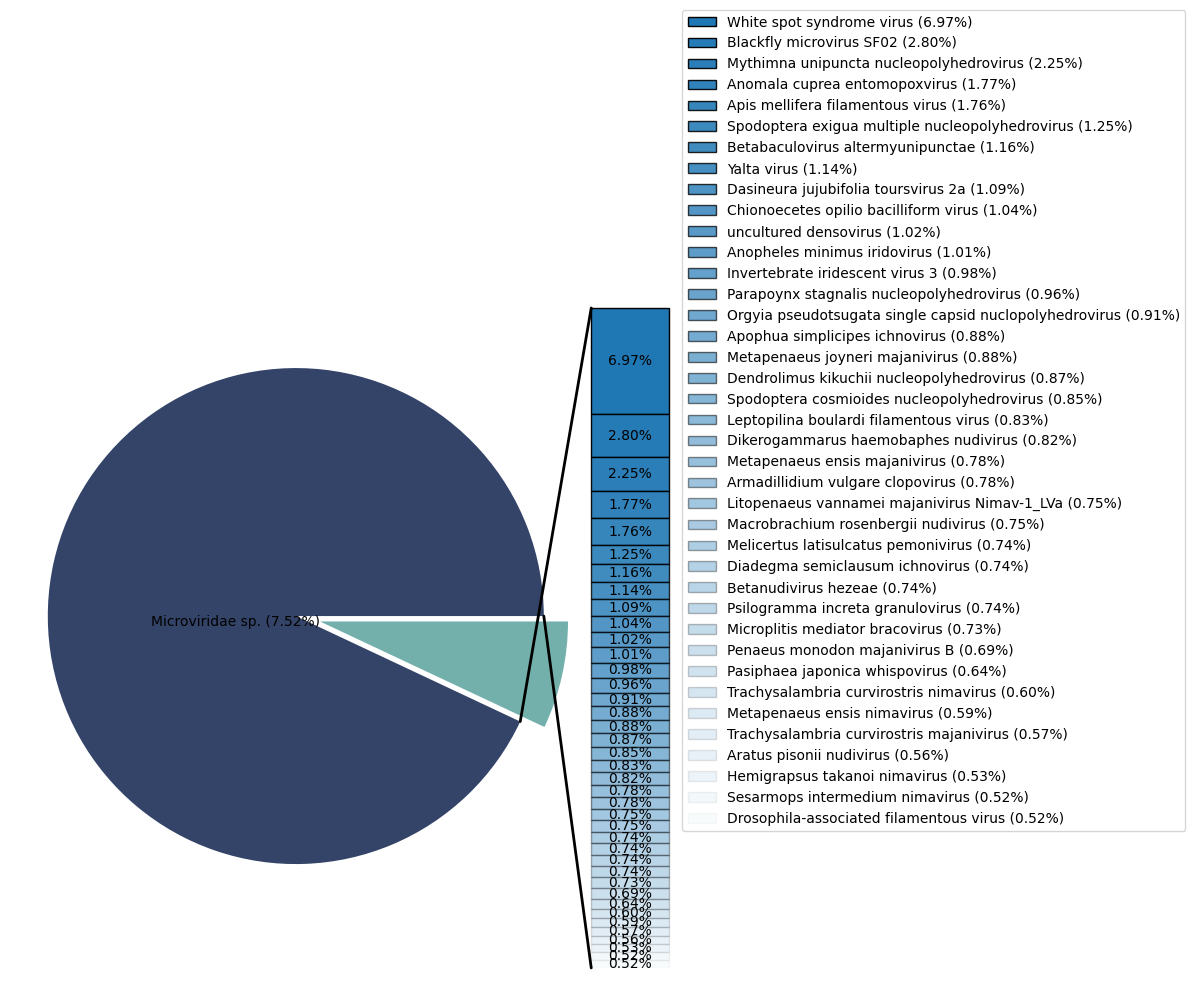

In [49]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9))
fig.subplots_adjust(wspace=-.5)

# pie chart parameters
pie_values = [df[df['virus_name'] != ""].shape[0], df[df['virus_name'] == "Microviridae sp."].shape[0]]
pie_labels = ['', vir_prevalence_data["Microviridae sp."]]
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
#angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(pie_values, startangle=0,
                     labels=pie_labels, explode=explode, 
                     labeldistance=0,
                     colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(pie_labels)+1, reverse=True))

# bar chart parameters
bar_values = [i for i in reversed(vir_count_data.values())]
bar_labels = [i for i in reversed(vir_count_data.keys())]
bottom = 1
width = 10.1
bar_total = sum(bar_values)

print(bar_total)
# Adding from the top matches the legend.
for j, (val, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    height = val / bar_total
    print(f"{label} > {val} > {height}")
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=vir_prevalence_data[label], edgecolor="black",
                 alpha=1-(1/len(bar_labels) * j))
    label_pct = val/n*100
    if label_pct > 0.01:
        ax2.bar_label(bc, labels=[f"{val/n*100:.2f}%"], label_type='center')

ax2.legend(loc="center",
          bbox_to_anchor=(.99, .79))
ax2.axis('off')
ax2.set_xlim(-4*width, 4*width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 1

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/iv_viruses_pie_bar.pdf"), bbox_inches="tight", dpi=600)
plt.show()

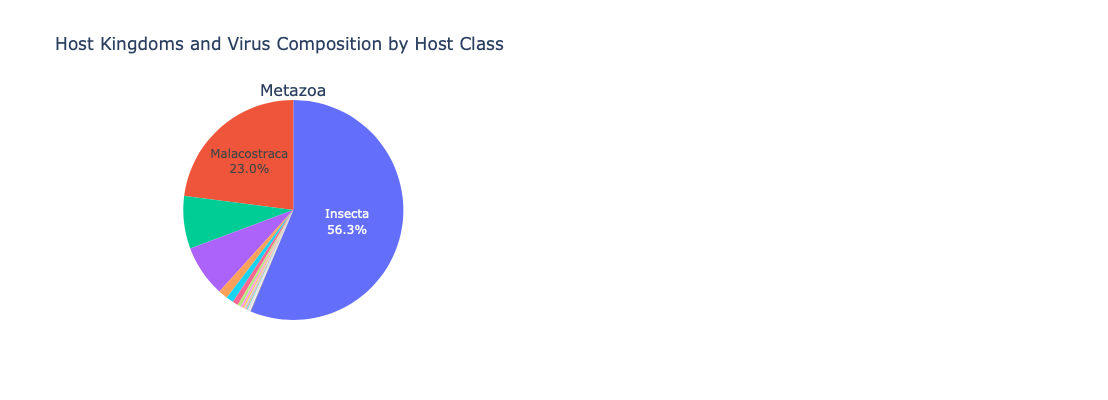

In [50]:
# configure subplots on grid
ncols = 2
nrows = (n_kingdoms + ncols - 1) // ncols

fig = make_subplots(
    rows=nrows, cols=ncols,
    specs=[[{'type':'domain'}]*ncols for _ in range(nrows)],
    subplot_titles=unique_kingdoms
)

# set threshold for virus and label display; initialize virus_taxon_level to family
threshold = 0.15
virus_taxon_level = "virus_family"
label_threshold = 20

# loop over the unique kingdoms; store data in class labels, class sizes, hover texts, and text labels to display information orderly
for i, kingdom in enumerate(unique_kingdoms):
    row = i // ncols + 1
    col = i % ncols + 1
    
    sub_df = df[df["kingdom"] == kingdom]
    
    class_counts = sub_df["class"].value_counts()
    
    class_labels = []
    class_sizes = []
    hover_texts = []
    text_labels = []
    
    total_count = class_counts.sum()

    # iterate over each class in the respective kingdom
    for host_class, count in class_counts.items():
        class_labels.append(host_class)
        class_sizes.append(count)
        
        # ensure the host class percentage is above threshold to display text on graph
        percentage = (count / total_count) * 100
        if percentage >= label_threshold:
            text_labels.append(f"{host_class}<br>{percentage:.1f}%")
        else:
            # empty string will "hide" the label
            text_labels.append("")
        
        # retrieve the virus taxon breakdown for each host class
        host_class_df = sub_df[sub_df["class"] == host_class]
        
        virus_counts = (
            host_class_df[virus_taxon_level]
            .value_counts(normalize=True) * 100
        )
        # ensure virus counts exceeds threshold to display on graph
        virus_counts = virus_counts[virus_counts >= threshold]
        other_pct = 100 - virus_counts.sum()

        # configure hover text for display of virus distributions
        virus_lines = [f"{vf}: {pct:.1f}%" for vf, pct in virus_counts.items()]
        if other_pct > 0:
            virus_lines.append(f"Other: {other_pct:.1f}%")

        hover_text = f"<b>{host_class}</b><br>Viruses:<br>" + "<br>".join(virus_lines)
        hover_texts.append(hover_text)

    # add all information to plotly pie chart and display graphs
    fig.add_trace(
        go.Pie(
            labels=class_labels,
            values=class_sizes,
            text=text_labels,
            hoverinfo="label+percent+text",
            textinfo='text',
            hovertext=hover_texts,
            hovertemplate="%{hovertext}<extra></extra>",
            sort=False
        ),
        row=row,
        col=col
    )

# update the layout of the pie charts by adjusting the height and width and include title text
fig.update_layout(
    height=400 * nrows,
    width=700 * ncols,
    title_text="Host Kingdoms and Virus Composition by Host Class",
    showlegend=False,
)
fig.show()

## Observations & Interesting Findings

* The Microviridae family (phages that infect bacteria) includes a viral strain (Microviridae sp.) with the highest prevalence in the dataset, however Baculoviridae virus family (primarily infect insects, ex: catepillars) are the major infecting family
* The majority of species infected by a virus in the Microviridae family (approximately 99.2%) belong to the class Ascidiacea, commonly known as sea squirts
* The Insecta and Malacostraca classes encompasses the majority of invertebrate animal hosts
* Majority of viral protein sequences from the viruses that infect invertebrate animal hosts are roughly between 150 to 310 amino acids (longer than the average invertebrate host)
* In an overview, there are 12,898 invertebrate animal hosts of 80,536 invertebrate hosts (with 900 unique animal tax ids)